#0 - Inicialización

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#%% Carga de librerías.
import pandas as pd
from sklearn import preprocessing 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#1- Cargar Datos

In [6]:
#%% Carga del dataframe.
dataframe = pd.read_csv('/content/drive/MyDrive/datosmadrid/puntos_medida_decimal.csv',';',low_memory=False)

# La función head de pandas nos sirve para imprimir por pantalla las primeras filas del dataframe
print(dataframe.head(3))

#comprobamos tipo datos contenido en la tabla
dataframe.dtypes

     id  longitud    latitud
0  1001 -3.670894  40.440938
1  1002 -3.671185  40.507342
2  1003 -3.671261  40.479430


id            int64
longitud    float64
latitud     float64
dtype: object

In [7]:
#convertimos datos id en categorico
dataframe["id"]=dataframe["id"].astype("category")
dataframe.dtypes

id          category
longitud     float64
latitud      float64
dtype: object

No handles with labels found to put in legend.


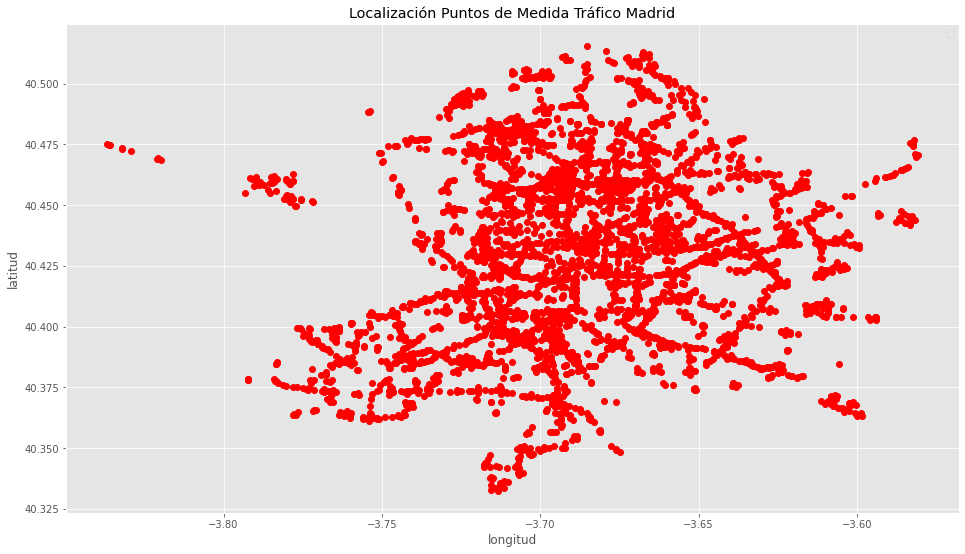

In [8]:
#Imprimimos puntos de medida, latitud y longitud
plt.plot(dataframe["longitud"],dataframe["latitud"], 'ro')
plt.title('Localización Puntos de Medida Tráfico Madrid')
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.legend()
plt.show()

In [ ]:
#se crean los vectores para la clusterizacion de los puntos de medida
X = np.array(dataframe[["longitud","latitud"]])
y = np.array(dataframe['id'])
X.shape

(4153, 2)

In [ ]:
#Se crea el modelo de clusterizacion
#No se utiliza el modelo del codo para cálcular K ya que lo que se busca es una grupación de ptos cercanos
#se utiliza K=300 para agrupar aproximadamente 15puntos cercanos
kmeans = KMeans(n_clusters=300).fit(X)
etiqueta=kmeans.labels_
print(etiqueta)
centroids = kmeans.cluster_centers_
print(centroids)

[266  25 135 ... 160 249 184]
[[-3.65132974e+12  4.04840695e+13]
 [-3.69662749e+12  4.03967828e+13]
 [-3.69898515e+12  4.04530015e+13]
 [-3.63494720e+12  4.03852351e+13]
 [-3.74550619e+12  4.04026619e+13]
 [-3.63589897e+12  4.04323865e+13]
 [-3.71569097e+12  4.04821612e+13]
 [-3.78559298e+12  4.04563153e+13]
 [-3.74108493e+12  4.03858478e+13]
 [-3.61738865e+12  4.04590863e+13]
 [-3.69499720e+12  4.03582015e+13]
 [-3.67016096e+12  4.04069939e+13]
 [-3.67388429e+12  4.04581487e+13]
 [-3.71309392e+12  4.04226019e+13]
 [-3.60556150e+12  4.04244178e+13]
 [-3.68268219e+12  4.04835681e+13]
 [-3.66045475e+12  4.04446086e+13]
 [-3.76805271e+12  4.03795574e+13]
 [-3.72325756e+12  4.04039087e+13]
 [-3.68458479e+12  4.04361263e+13]
 [-3.60791514e+12  4.03693317e+13]
 [-3.73910451e+12  4.04761505e+13]
 [-3.70356916e+12  4.03490215e+13]
 [-3.71450241e+12  4.04464342e+13]
 [-3.58207995e+12  4.04737946e+13]
 [-3.66849605e+12  4.05097952e+13]
 [-3.62998081e+12  4.04088807e+13]
 [-3.65520400e+12  4.0421

In [ ]:
#Se añade en la tabla el cluster al que pertence cada punto de medida
lista= etiqueta.tolist()
print(lista)
dataframe['cluster'] = lista
print(dataframe.head(3))

[266, 25, 135, 117, 249, 29, 126, 126, 51, 3, 5, 26, 163, 5, 78, 161, 9, 40, 274, 40, 274, 9, 9, 9, 9, 9, 39, 100, 100, 248, 137, 165, 267, 66, 26, 165, 26, 3, 126, 287, 5, 177, 249, 22, 6, 133, 136, 252, 51, 51, 79, 225, 218, 44, 106, 289, 277, 247, 153, 129, 16, 213, 240, 224, 27, 182, 234, 79, 219, 191, 255, 287, 253, 297, 270, 133, 87, 2, 37, 47, 58, 53, 13, 50, 114, 98, 205, 60, 177, 205, 192, 234, 152, 89, 111, 277, 200, 189, 131, 37, 194, 87, 87, 211, 136, 13, 6, 184, 184, 243, 14, 134, 134, 20, 134, 272, 252, 287, 21, 29, 245, 179, 21, 18, 186, 191, 116, 168, 157, 6, 106, 48, 110, 217, 64, 167, 221, 169, 36, 127, 127, 113, 202, 107, 116, 259, 224, 21, 179, 234, 218, 117, 262, 259, 205, 115, 94, 193, 207, 287, 259, 254, 21, 259, 201, 283, 238, 151, 113, 205, 232, 254, 63, 117, 168, 101, 53, 151, 113, 228, 17, 185, 158, 113, 103, 16, 55, 5, 130, 99, 219, 198, 255, 265, 56, 113, 113, 202, 138, 96, 9, 284, 172, 209, 95, 172, 210, 234, 67, 67, 98, 81, 221, 47, 230, 236, 77, 24, 273,

In [ ]:
#Se extrae la tabla de puntos de medida con el cluster
dataframe.to_csv('clusterptosmedida.csv')

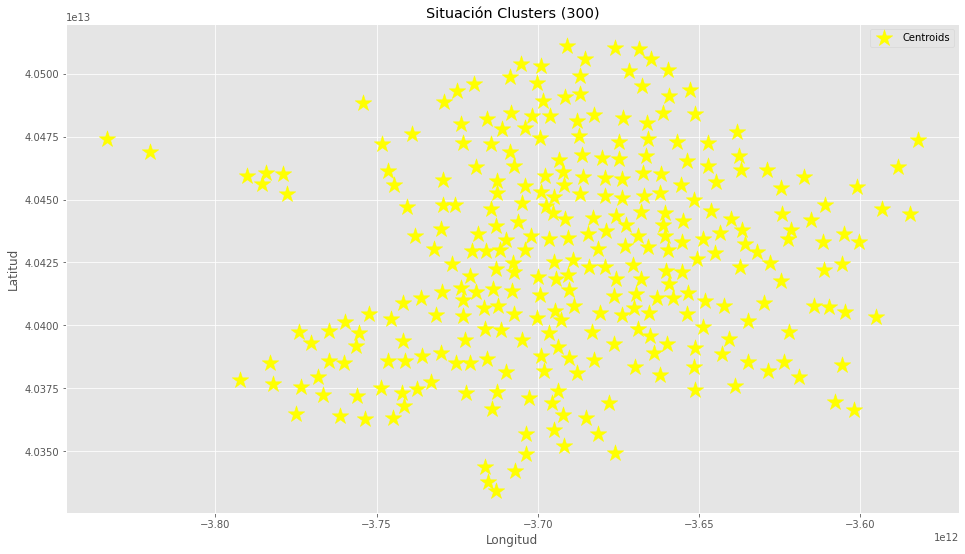

In [ ]:
#Se muestra la situación de los Clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')

plt.title('Situación Clusters (300)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

In [ ]:
#Comprobación del cluster en que se encuentra cada punto de medida
#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
X_prediccion = kmeans.predict(X)
for i, pred in enumerate(X_prediccion):
    print( "Pto medida Id:",y[i], "se encuentra en el clúster:", pred)

Pto medida Id: 1001 se encuentra en el clúster: 266
Pto medida Id: 1002 se encuentra en el clúster: 25
Pto medida Id: 1003 se encuentra en el clúster: 135
Pto medida Id: 1006 se encuentra en el clúster: 117
Pto medida Id: 1009 se encuentra en el clúster: 249
Pto medida Id: 1010 se encuentra en el clúster: 29
Pto medida Id: 1011 se encuentra en el clúster: 126
Pto medida Id: 1012 se encuentra en el clúster: 126
Pto medida Id: 1013 se encuentra en el clúster: 51
Pto medida Id: 1014 se encuentra en el clúster: 3
Pto medida Id: 1015 se encuentra en el clúster: 5
Pto medida Id: 1016 se encuentra en el clúster: 26
Pto medida Id: 1017 se encuentra en el clúster: 163
Pto medida Id: 1018 se encuentra en el clúster: 5
Pto medida Id: 1019 se encuentra en el clúster: 78
Pto medida Id: 1020 se encuentra en el clúster: 161
Pto medida Id: 1021 se encuentra en el clúster: 9
Pto medida Id: 1022 se encuentra en el clúster: 40
Pto medida Id: 1023 se encuentra en el clúster: 274
Pto medida Id: 1024 se enc

# New Section